We have a hierarchical system, where each object only sees the one below it in the hierarchy:

Model > Solver > Transition > Parameters > Individual Params

- The individual parameters (beta, gamma, etc.) are collected in a Parameters class. 

- The Transition takes in the Parameters. The Parameters parameterize the Transition equations. 

- The Solver takes in the Transition. The Solver needs the Transition functions to update the state. 

- The Model takes in the Solver. The Model needs the Solver to run and generate data. 

If the Model or solver needs some other sort of Hyper Parameters, they can be packaged in a different class/dictionary, rather than be lumped in with the current Parameters class.


### ModelFactory
The ModelFactory builds and returns a model, while also performing compatibility checks (SIRParameters go with SIR Transitions. Lorenz63 Params can't be used with SIR Transitions. etc.). This way, the Model class doesn't need to touch the Parameters just for validation --- that has already been done by the ModelFactory. 

The ModelFactory currently infers the type of process (Stochastic vs. Determinstic) by the type of Solver passed in. I'm not sure if this is ideal --- it can easily be changed if needed.

I haven't thought deeply about other processes (jump, tau-leap, etc.) but I believe they will fit in with this system. 

## Examples
Note the functional beta. 

In [1]:
from sphere.model.model_factory import ModelFactory
from sphere.model.parameters import SIRParameters
from sphere.model.solver import EulerSolver, EulerMaruyamaSolver
from sphere.model.functional_params import StepFunctionParam

beta_fun = StepFunctionParam(values=[0.4, 0.1], period=30)
SIR_params = SIRParameters(beta=beta_fun, gamma=0.08, population=100005)

SIR_det = ModelFactory.create_model(
    model_type="SIR", params=SIR_params, solver_cls=EulerSolver
)

In [2]:
SIR_det.run(x0=(100000, 20, 0), t0=0, t_final=100, dt=1.0)

Model.run() was successful. Data is accessible at Model.output.states. Plot the output with Model.output.plot_states().


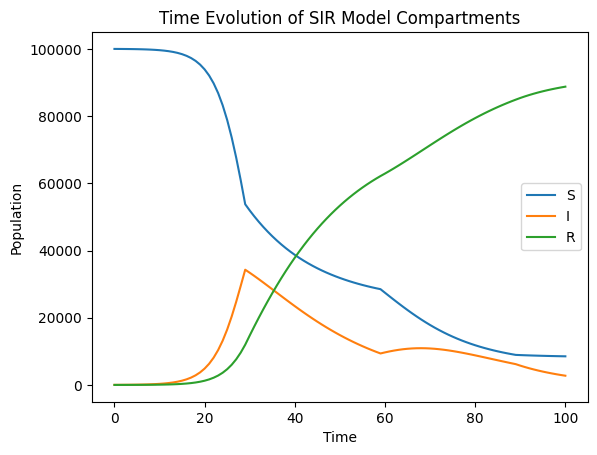

In [3]:
SIR_det.output.plot_states()

In [7]:
SIR_sto = ModelFactory.create_model(model_type='SIR', params=SIR_params, solver_cls=EulerMaruyamaSolver)

TypeError: StochasticTransition.__init__() missing 1 required positional argument: 'key'

Possible issues:
- For SIR, should `Parameters.population` be calculated from the initial state that the user passes in the `model.run()` method? 